In [1]:
require 'torch'
require 'nn'
require 'image'
utils = require 'utils'
require 'nngraph'
require 'ShaveImage'

In [2]:
local cmd = torch.CmdLine()

-- Model options
cmd:option('-model', 'checkpoint.t7')

-- Input / output options
cmd:option('-input_image', 'ei_capitan.jpeg')
cmd:option('-output_image', 'out.png')
cmd:option('-input_dir', '')
cmd:option('-output_dir', '')

-- GPU options
cmd:option('-gpu', -1)
cmd:option('-backend', 'cuda')
cmd:option('-use_cudnn', 1)
cmd:option('-cudnn_benchmark', 0)

opt = cmd:parse(arg or {})

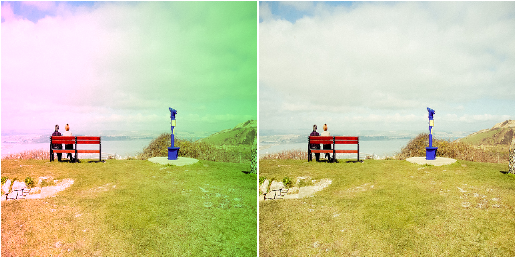

In [48]:
package.loaded['DataLoader'] = nil
require 'DataLoader'

opt.h5_file = "ms-coco-256.h5"
opt.batch_size = 1
dtype = "torch.FloatTensor"
loader = DataLoader(opt)

x, y = loader:getBatch('train')
x, y = x:type(dtype), y:type(dtype)
itorch.image({x[1], y[1]})

In [13]:
function  getLinearMatrix(tmin, tmax)
    local temp = torch.eye(256)
    for ind =1, temp:size()[1] do
        temp[ind][ind] = tmin + (ind - 1) * (tmax - tmin) / (temp:size()[1] - 1)
    end
    return temp:type('torch.FloatTensor')
end

function random(lower, upper)
    local shrink = upper - lower
    return (torch.rand(1) * shrink + lower)[1]
end 

In [14]:
linearTmin = 0.5
linearTmax = 1.5
liMat    = getLinearMatrix(linearTmin, linearTmax)
liMatRev = getLinearMatrix(linearTmax, linearTmin)

In [19]:
function linearTrans(img)
    assert(#img:size() == 3)
    if random(-1.0, 1.0) >= 0 then
        mat = liMat
    else
        mat = liMatRev
    end
    local z = img:clone()
    
    if random(-1.0, 1.0) >= 0 then
        z[1] = img[1] * mat
        z[3] = img[3] * mat
    else
        z[1] = mat * img[1]
        z[3] = mat * img[3]
    end
    for ind = 1,3 do 
        z[ind][torch.lt(z[ind], 0)] = 0
        z[ind][torch.gt(z[ind], 1)] = 1
    end
    return z
end

In [32]:
y[1]:size()

   3
 256
 256
[torch.LongStorage of size 3]



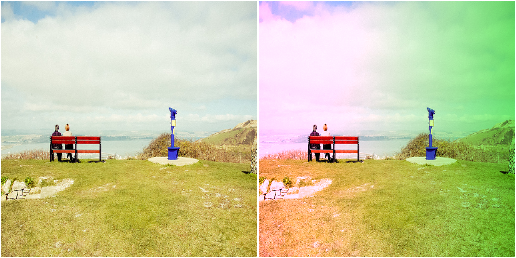

In [20]:
z = linearTrans( y[1])
itorch.image({y[1], z})

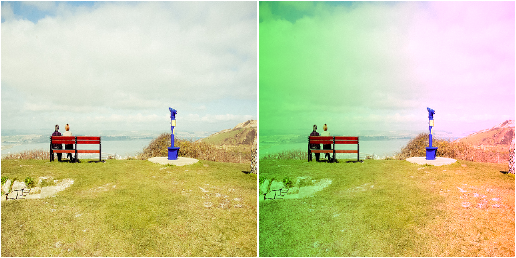

In [21]:
z = y[1]:clone()

ind = 1
z[ind] = z[ind] * liMat
z[ind][torch.lt(z[ind], 0)] = 0
z[ind][torch.gt(z[ind], 1)] = 1

ind = 3
z[ind] = z[ind] * liMat
z[ind][torch.lt(z[ind], 0)] = 0
z[ind][torch.gt(z[ind], 1)] = 1

itorch.image({y[1], z})